In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## 1. Gathering Data:

Reading  Data from the CSV File 

In [2]:
df_Data_original = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

## 2. Assessing Data:

- In this Phase A data quality assessment is done by measuring particular features of the data to see if they meet defined standards. Each such feature is called a “data quality dimension,” and is rated according to a relevant metric that provides an objective assessment of quality.

In [3]:
df_Data_original.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df_Data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df_Data_original[df_Data_original.AppointmentID.duplicated()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [6]:
df_Data_original[['Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']].describe()

,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df_Data_original[['Handcap']].value_counts()

Handcap
0          108286
1            2042
2             183
3              13
4               3
dtype: int64

In [8]:
df_Data_original['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [9]:
df_Data_original['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [11]:
df_Data_original.Hipertension.value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

### Conclusions:
- There is no null Values.
- There is no duplicates in Appointment id Column
- The Minimum Value in all Rows of Scholarship, Hipertension, Diabetes ,Alcoholism, Handcap, SMS_received equal Zero. 
- The Maximum Value in all Rows of Scholarship, Hipertension, Diabetes ,Alcoholism, SMS_received equal one except Handcap.
- The Data type of ScheduledDay and AppointmentDay should be converted to Date Time data type.
- Some Columns have Typo in their names.
- There are Ages below and equal to Zero and equals 115 which doesn't make sense.

## 3. Cleaning Data:

In [16]:
df_data_clean = df_Data_original.copy()

**Convert Data Type of AppointmentDay and ScheduledDay Column.**

In [17]:
df_data_clean['ScheduledDay'] = pd.to_datetime(df_data_clean.ScheduledDay)
df_data_clean['AppointmentDay'] = pd.to_datetime(df_data_clean.AppointmentDay)

In [18]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

**Convert 1 and 0 to more meaningful Words (Yes, No)**

In [19]:
df_data_clean.Hipertension.replace(0, 'No', inplace=True)
df_data_clean.Hipertension.replace(1, 'Yes', inplace=True)
df_data_clean.Scholarship.replace(0, 'No', inplace=True)
df_data_clean.Scholarship.replace(1, 'Yes', inplace=True)
df_data_clean.Diabetes.replace(0, 'No', inplace=True)
df_data_clean.Diabetes.replace(1, 'Yes', inplace=True)
df_data_clean.Alcoholism.replace(0, 'No', inplace=True)
df_data_clean.Alcoholism.replace(1, 'Yes', inplace=True)

In [20]:
df_data_clean = df_data_clean.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_Show'})

In [21]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  object             
 8   Hypertension    110527 non-null  object             
 9   Diabetes        110527 non-null  object             
 10  Alcoholism      110527 non-null  object             
 11  Handicap        110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No_Show       

**Extract Day name and Hour from the Scheduled and Appointement Date.**

In [22]:
df_data_clean['Day'] = df_data_clean['ScheduledDay'].dt.day_name()
df_data_clean['Scheduled Hour'] = df_data_clean['ScheduledDay'].dt.hour
df_data_clean['Appointement Hour'] = df_data_clean['AppointmentDay'].dt.hour



In [23]:
df_data_clean

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,Day,Scheduled Hour,Appointement Hour
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,No,Yes,No,No,0,0,No,Friday,18,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,No,No,No,No,0,0,No,Friday,16,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,No,No,No,No,0,0,No,Friday,16,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,No,No,No,No,0,0,No,Friday,17,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,No,Yes,Yes,No,0,0,No,Friday,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,No,No,No,No,0,1,No,Tuesday,9,0
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,No,No,No,No,0,1,No,Tuesday,7,0
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,No,No,No,No,0,1,No,Wednesday,16,0
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,No,No,No,No,0,1,No,Wednesday,15,0


In [24]:
df_data_clean['Day'].value_counts()

Tuesday      26168
Wednesday    24262
Monday       23085
Friday       18915
Thursday     18073
Saturday        24
Name: Day, dtype: int64

**Find the Difference between the Schedule day and Appointment Day (TimeSpan)**

In [25]:
df_data_clean['Timespan']=(df_data_clean['AppointmentDay'] - df_data_clean['ScheduledDay']).dt.days

In [26]:
df_data_clean.Timespan.describe()

count    110527.000000
mean          9.183702
std          15.254996
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: Timespan, dtype: float64

**Note: There is negative TimeSpan**

**Replace the Negative Timespan with Zero, because the negative time span means they don't have to wait**

In [27]:
df_data_clean[df_data_clean.Timespan < 0] = 0

In [28]:
df_data_clean

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,Day,Scheduled Hour,Appointement Hour,Timespan
0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,No,No,No,No,0,1,No,Tuesday,9,0,34
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,No,No,No,No,0,1,No,Tuesday,7,0,34
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,No,No,No,No,0,1,No,Wednesday,16,0,40
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,No,No,No,No,0,1,No,Wednesday,15,0,40


**Drop the Rows with age below or equal zero or equal 115**

In [29]:
df_data_clean = df_data_clean[df_data_clean.Age > 0]
df_data_clean = df_data_clean[df_data_clean.Age < 115]

In [30]:
df_data_clean['Age'].describe()

count    69824.000000
mean        39.673264
std         22.241751
min          1.000000
25%         21.000000
50%         40.000000
75%         57.000000
max        102.000000
Name: Age, dtype: float64

In [31]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69824 entries, 5 to 110526
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PatientId          69824 non-null  float64
 1   AppointmentID      69824 non-null  int64  
 2   Gender             69824 non-null  object 
 3   ScheduledDay       69824 non-null  object 
 4   AppointmentDay     69824 non-null  object 
 5   Age                69824 non-null  int64  
 6   Neighbourhood      69824 non-null  object 
 7   Scholarship        69824 non-null  object 
 8   Hypertension       69824 non-null  object 
 9   Diabetes           69824 non-null  object 
 10  Alcoholism         69824 non-null  object 
 11  Handicap           69824 non-null  int64  
 12  SMS_received       69824 non-null  int64  
 13  No_Show            69824 non-null  object 
 14  Day                69824 non-null  object 
 15  Scheduled Hour     69824 non-null  int64  
 16  Appointement Hour  69

## 4. Analyze Data:

**Question 1: What is the day that Patients most likely to schedule ?**

In [32]:
df_data_clean['Day'].value_counts()

Tuesday      16451
Wednesday    15003
Monday       14464
Friday       12100
Thursday     11792
Saturday        14
Name: Day, dtype: int64

<AxesSubplot:>

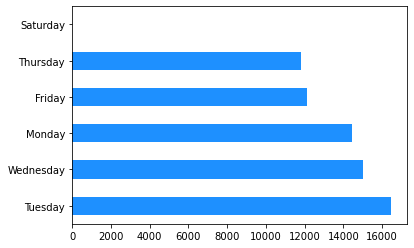

In [33]:
df_data_clean['Day'].value_counts().plot(kind = 'barh', color=['dodgerblue'] ,legend = None)

**Conclusion: Tuesday is the most likely to be scheduled by patients**

**Question 2: Which Gender is most likely to No-Show ?**

In [34]:
df_gender = df_data_clean[['Gender','No_Show']].groupby('No_Show')


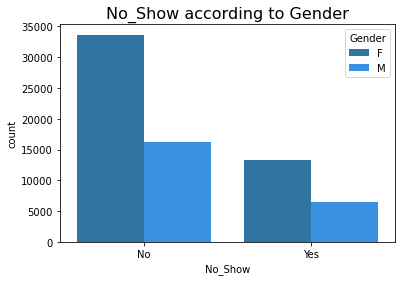

In [35]:
ax = sns.countplot(x=df_data_clean.No_Show, hue=df_data_clean.Gender, data=df_data_clean ,palette=["C0", "dodgerblue"])
ax.set_title("No_Show according to Gender", size='16')
plt.show()

**Conclusion: Females are most Likely to No-Show**

**Age Distribution Visualization**

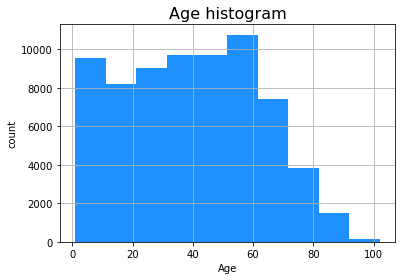

In [36]:
df_data_clean.Age.hist(color=['dodgerblue'])
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age histogram', size='16')
plt.show()

**Question 3: What is the Relation between the Timespan and the No-Show**

In [37]:
df_corr = df_data_clean.No_Show.replace('No', 0, inplace=True)
df_corr = df_data_clean.No_Show.replace('Yes',1, inplace=True)
df_corr = df_data_clean[df_data_clean.Timespan > 0]

In [38]:
df_corr.Timespan.corr(df_corr.No_Show) #finding Correlation between Timespan and No_Show

0.05347779231245116

**Conclusion: There is positive Correlation between Timespan and No_Show which means as Timespan increases the No_Show Probability Increases.**

**Time Span Distribution**

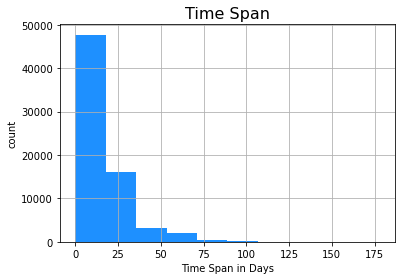

In [39]:
df_data_clean.Timespan.hist(color=['dodgerblue'])
plt.xlabel('Time Span in Days')
plt.ylabel('count')
plt.title('Time Span', size='16')
plt.show()

**Conclusion: Most of the Timespan Lies between 0 and 40 days**

**- Limitations of the Analysis:**

1. Appointment date doesn't have an actual time but the day only, which if existed might help us to determine if the patients are most likely no-show on a certain hour of the day.
2. Timespan between Scheduled date and Appointment Date is Negative, there is no information about these issue, whether the Patients come early before the Scheduled day or it’s a typo in the Data entry.
